In [ ]:
## In this notebook, we try to learn by filter by patient pay

In [1]:
import numpy as np
import pandas as pd

from catboost import Pool, CatBoostRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("pharmacy_new.csv")

In [3]:
df =df.drop(columns=['tx_date', 'drug', 'bin', 'diagnosis_letter', 'diagnosis_number','Unnamed: 0'])

In [4]:
df = df[df['rejected'] == False]
df = df.drop(columns='rejected')

In [5]:
df['patient_pay'].describe()

count    1.151201e+07
mean     2.676802e+01
std      4.177772e+01
min      3.400000e+00
25%      1.044000e+01
50%      1.399000e+01
75%      1.982000e+01
max      5.579300e+02
Name: patient_pay, dtype: float64

In [6]:
df['insurance'] = df['pcn'].astype('str')+df['group'].astype('str')
df = df.drop(columns=['pcn','group'])

In [7]:
df75= df[df['patient_pay']<20]
dfmore = df[df['patient_pay']>=20]

In [8]:
train75, test75 = train_test_split(df75, test_size=0.2, shuffle=True, random_state=42)

In [9]:
train_data75 = train75.drop(columns=['patient_pay'])
train_label75 = train75['patient_pay']

In [10]:
train_data75.columns

Index(['pharmacy', 'diagnosis', 'brand', 'drug_name', 'month', 'insurance'], dtype='object')

In [11]:
train_pool75 = Pool(train_data75, train_label75, cat_features = list(range(6)))

In [13]:
model75 = CatBoostRegressor(iterations =999, 
                         depth = 8,
                         learning_rate=.03,
                         loss_function = 'RMSE')
model75.fit(train_pool75)

0:	learn: 4.2141530	total: 9.73s	remaining: 2h 41m 56s
1:	learn: 4.1455235	total: 15s	remaining: 2h 4m 28s
2:	learn: 4.0799051	total: 23.1s	remaining: 2h 7m 53s
3:	learn: 4.0168451	total: 27.9s	remaining: 1h 55m 31s
4:	learn: 3.9235258	total: 37.1s	remaining: 2h 2m 48s
5:	learn: 3.8318557	total: 42.4s	remaining: 1h 56m 59s
6:	learn: 3.7435807	total: 48.7s	remaining: 1h 54m 56s
7:	learn: 3.6583441	total: 54s	remaining: 1h 51m 35s
8:	learn: 3.5764409	total: 59.3s	remaining: 1h 48m 42s
9:	learn: 3.4975390	total: 1m 4s	remaining: 1h 46m 10s
10:	learn: 3.4215713	total: 1m 10s	remaining: 1h 45m 49s
11:	learn: 3.3485235	total: 1m 16s	remaining: 1h 44m 27s
12:	learn: 3.2778641	total: 1m 21s	remaining: 1h 43m 6s
13:	learn: 3.2096967	total: 1m 26s	remaining: 1h 41m 40s
14:	learn: 3.1439867	total: 1m 31s	remaining: 1h 40m 14s
15:	learn: 3.0808813	total: 1m 36s	remaining: 1h 38m 51s
16:	learn: 3.0204224	total: 1m 41s	remaining: 1h 38m 5s
17:	learn: 2.9619327	total: 1m 46s	remaining: 1h 37m 3s
18:	

145:	learn: 1.3876374	total: 11m 13s	remaining: 1h 5m 36s
146:	learn: 1.3861966	total: 11m 17s	remaining: 1h 5m 26s
147:	learn: 1.3816796	total: 11m 21s	remaining: 1h 5m 21s
148:	learn: 1.3795172	total: 11m 25s	remaining: 1h 5m 13s
149:	learn: 1.3767657	total: 11m 29s	remaining: 1h 5m 3s
150:	learn: 1.3750203	total: 11m 32s	remaining: 1h 4m 51s
151:	learn: 1.3737790	total: 11m 36s	remaining: 1h 4m 39s
152:	learn: 1.3719967	total: 11m 39s	remaining: 1h 4m 27s
153:	learn: 1.3704394	total: 11m 42s	remaining: 1h 4m 16s
154:	learn: 1.3683796	total: 11m 46s	remaining: 1h 4m 5s
155:	learn: 1.3658970	total: 11m 50s	remaining: 1h 3m 58s
156:	learn: 1.3633906	total: 11m 53s	remaining: 1h 3m 48s
157:	learn: 1.3617723	total: 11m 57s	remaining: 1h 3m 38s
158:	learn: 1.3605691	total: 12m	remaining: 1h 3m 26s
159:	learn: 1.3588319	total: 12m 4s	remaining: 1h 3m 18s
160:	learn: 1.3568536	total: 12m 7s	remaining: 1h 3m 8s
161:	learn: 1.3556776	total: 12m 11s	remaining: 1h 2m 58s
162:	learn: 1.3543227	t

292:	learn: 1.1920957	total: 21m 15s	remaining: 51m 14s
293:	learn: 1.1914373	total: 21m 20s	remaining: 51m 9s
294:	learn: 1.1900553	total: 21m 24s	remaining: 51m 6s
295:	learn: 1.1890550	total: 21m 29s	remaining: 51m 2s
296:	learn: 1.1883893	total: 21m 33s	remaining: 50m 57s
297:	learn: 1.1875700	total: 21m 38s	remaining: 50m 54s
298:	learn: 1.1868102	total: 21m 42s	remaining: 50m 50s
299:	learn: 1.1860279	total: 21m 47s	remaining: 50m 45s
300:	learn: 1.1854658	total: 21m 51s	remaining: 50m 40s
301:	learn: 1.1844700	total: 21m 55s	remaining: 50m 35s
302:	learn: 1.1835067	total: 21m 58s	remaining: 50m 29s
303:	learn: 1.1830020	total: 22m 2s	remaining: 50m 23s
304:	learn: 1.1824377	total: 22m 5s	remaining: 50m 16s
305:	learn: 1.1817550	total: 22m 9s	remaining: 50m 10s
306:	learn: 1.1808829	total: 22m 13s	remaining: 50m 5s
307:	learn: 1.1799861	total: 22m 17s	remaining: 50m
308:	learn: 1.1795579	total: 22m 20s	remaining: 49m 54s
309:	learn: 1.1788031	total: 22m 24s	remaining: 49m 48s
310

440:	learn: 1.0783341	total: 31m 51s	remaining: 40m 19s
441:	learn: 1.0779937	total: 31m 56s	remaining: 40m 14s
442:	learn: 1.0775195	total: 32m	remaining: 40m 10s
443:	learn: 1.0760802	total: 32m 5s	remaining: 40m 6s
444:	learn: 1.0751982	total: 32m 9s	remaining: 40m 2s
445:	learn: 1.0742438	total: 32m 13s	remaining: 39m 57s
446:	learn: 1.0736587	total: 32m 17s	remaining: 39m 52s
447:	learn: 1.0722340	total: 32m 22s	remaining: 39m 48s
448:	learn: 1.0717655	total: 32m 26s	remaining: 39m 44s
449:	learn: 1.0713938	total: 32m 31s	remaining: 39m 40s
450:	learn: 1.0709971	total: 32m 35s	remaining: 39m 35s
451:	learn: 1.0701888	total: 32m 39s	remaining: 39m 30s
452:	learn: 1.0696020	total: 32m 43s	remaining: 39m 26s
453:	learn: 1.0691002	total: 32m 47s	remaining: 39m 22s
454:	learn: 1.0683382	total: 32m 52s	remaining: 39m 18s
455:	learn: 1.0678089	total: 32m 56s	remaining: 39m 13s
456:	learn: 1.0669763	total: 33m 1s	remaining: 39m 10s
457:	learn: 1.0664301	total: 33m 5s	remaining: 39m 5s
458

588:	learn: 0.9989480	total: 42m 44s	remaining: 29m 45s
589:	learn: 0.9983866	total: 42m 48s	remaining: 29m 40s
590:	learn: 0.9977638	total: 42m 53s	remaining: 29m 36s
591:	learn: 0.9972429	total: 42m 58s	remaining: 29m 32s
592:	learn: 0.9969350	total: 43m 2s	remaining: 29m 27s
593:	learn: 0.9967168	total: 43m 6s	remaining: 29m 23s
594:	learn: 0.9964083	total: 43m 10s	remaining: 29m 18s
595:	learn: 0.9960016	total: 43m 14s	remaining: 29m 14s
596:	learn: 0.9957506	total: 43m 18s	remaining: 29m 9s
597:	learn: 0.9952921	total: 43m 22s	remaining: 29m 5s
598:	learn: 0.9945063	total: 43m 27s	remaining: 29m 1s
599:	learn: 0.9942320	total: 43m 32s	remaining: 28m 57s
600:	learn: 0.9936549	total: 43m 36s	remaining: 28m 52s
601:	learn: 0.9930720	total: 43m 40s	remaining: 28m 48s
602:	learn: 0.9927320	total: 43m 45s	remaining: 28m 43s
603:	learn: 0.9923979	total: 43m 49s	remaining: 28m 39s
604:	learn: 0.9918825	total: 43m 53s	remaining: 28m 34s
605:	learn: 0.9914880	total: 43m 57s	remaining: 28m 3

736:	learn: 0.9417636	total: 53m 28s	remaining: 19m
737:	learn: 0.9414603	total: 53m 33s	remaining: 18m 56s
738:	learn: 0.9412709	total: 53m 37s	remaining: 18m 52s
739:	learn: 0.9408224	total: 53m 42s	remaining: 18m 47s
740:	learn: 0.9406476	total: 53m 46s	remaining: 18m 43s
741:	learn: 0.9404874	total: 53m 50s	remaining: 18m 38s
742:	learn: 0.9402179	total: 53m 54s	remaining: 18m 34s
743:	learn: 0.9400842	total: 53m 58s	remaining: 18m 30s
744:	learn: 0.9395506	total: 54m 3s	remaining: 18m 25s
745:	learn: 0.9392556	total: 54m 7s	remaining: 18m 21s
746:	learn: 0.9391135	total: 54m 11s	remaining: 18m 16s
747:	learn: 0.9385004	total: 54m 16s	remaining: 18m 12s
748:	learn: 0.9381979	total: 54m 20s	remaining: 18m 8s
749:	learn: 0.9380236	total: 54m 24s	remaining: 18m 3s
750:	learn: 0.9376915	total: 54m 29s	remaining: 17m 59s
751:	learn: 0.9368603	total: 54m 34s	remaining: 17m 55s
752:	learn: 0.9365566	total: 54m 38s	remaining: 17m 51s
753:	learn: 0.9364383	total: 54m 42s	remaining: 17m 46s


883:	learn: 0.8921369	total: 1h 4m 15s	remaining: 8m 21s
884:	learn: 0.8919102	total: 1h 4m 20s	remaining: 8m 17s
885:	learn: 0.8913825	total: 1h 4m 25s	remaining: 8m 12s
886:	learn: 0.8910707	total: 1h 4m 29s	remaining: 8m 8s
887:	learn: 0.8905537	total: 1h 4m 34s	remaining: 8m 4s
888:	learn: 0.8900348	total: 1h 4m 39s	remaining: 7m 59s
889:	learn: 0.8896136	total: 1h 4m 43s	remaining: 7m 55s
890:	learn: 0.8890862	total: 1h 4m 48s	remaining: 7m 51s
891:	learn: 0.8888515	total: 1h 4m 53s	remaining: 7m 47s
892:	learn: 0.8885472	total: 1h 4m 57s	remaining: 7m 42s
893:	learn: 0.8883055	total: 1h 5m 1s	remaining: 7m 38s
894:	learn: 0.8880776	total: 1h 5m 6s	remaining: 7m 33s
895:	learn: 0.8875515	total: 1h 5m 10s	remaining: 7m 29s
896:	learn: 0.8874148	total: 1h 5m 14s	remaining: 7m 25s
897:	learn: 0.8869729	total: 1h 5m 19s	remaining: 7m 20s
898:	learn: 0.8868217	total: 1h 5m 23s	remaining: 7m 16s
899:	learn: 0.8865734	total: 1h 5m 27s	remaining: 7m 12s
900:	learn: 0.8862463	total: 1h 5m 

In [14]:
test_data75 = test75.drop(columns=['patient_pay'])
test_label75 = test75['patient_pay']
preds75=model75.predict(test_data75)
diff75 = abs(preds75 - test_label75)
diff75.describe()

count    1.750189e+06
mean     5.735458e-01
std      6.149208e-01
min      3.574733e-06
25%      1.415309e-01
50%      3.535920e-01
75%      8.058250e-01
max      8.079489e+00
Name: patient_pay, dtype: float64

In [15]:
np.percentile(diff75, 90), np.percentile(diff75, 95), np.percentile(diff75, 98), np.percentile(diff75, 99), np.percentile(diff75, 100)

(1.4211718359561152,
 1.8372394315722769,
 2.319194499727086,
 2.727586911303058,
 8.079488753236282)

In [16]:
test_label75.describe()

count    1.750189e+06
mean     1.219056e+01
std      4.284034e+00
min      3.400000e+00
25%      8.810000e+00
50%      1.174000e+01
75%      1.599000e+01
max      1.999000e+01
Name: patient_pay, dtype: float64

In [ ]:
#### Those over 75 percentile

In [17]:
trainmore, testmore = train_test_split(dfmore, test_size=0.2, shuffle=True, random_state=42)

In [18]:
train_datamore = trainmore.drop(columns=['patient_pay'])
train_labelmore = trainmore['patient_pay']

In [19]:
train_poolmore = Pool(train_datamore, train_labelmore, cat_features = list(range(6)))

In [20]:
modelmore = CatBoostRegressor(iterations =999, 
                         depth = 5,
                         learning_rate=.05,
                         loss_function = 'RMSE')
modelmore.fit(train_poolmore)

0:	learn: 64.0583481	total: 1.21s	remaining: 20m 8s
1:	learn: 61.8097310	total: 2.54s	remaining: 21m 7s
2:	learn: 59.7046408	total: 3.73s	remaining: 20m 36s
3:	learn: 57.7333389	total: 4.49s	remaining: 18m 37s
4:	learn: 55.8945188	total: 5.27s	remaining: 17m 28s
5:	learn: 54.1717495	total: 6.18s	remaining: 17m 3s
6:	learn: 52.5687403	total: 6.97s	remaining: 16m 28s
7:	learn: 50.9772602	total: 7.75s	remaining: 15m 59s
8:	learn: 49.4396242	total: 8.49s	remaining: 15m 34s
9:	learn: 48.0560127	total: 9.24s	remaining: 15m 14s
10:	learn: 46.7139536	total: 9.98s	remaining: 14m 56s
11:	learn: 45.4674042	total: 10.7s	remaining: 14m 42s
12:	learn: 44.3449909	total: 11.5s	remaining: 14m 33s
13:	learn: 43.2648095	total: 12.3s	remaining: 14m 25s
14:	learn: 42.2666029	total: 13.1s	remaining: 14m 18s
15:	learn: 41.3604247	total: 13.9s	remaining: 14m 12s
16:	learn: 40.4836963	total: 14.7s	remaining: 14m 6s
17:	learn: 39.6720136	total: 15.5s	remaining: 14m 2s
18:	learn: 38.9120741	total: 16.2s	remainin

152:	learn: 21.0991100	total: 2m 23s	remaining: 13m 10s
153:	learn: 21.0814258	total: 2m 23s	remaining: 13m 9s
154:	learn: 21.0210820	total: 2m 24s	remaining: 13m 8s
155:	learn: 20.9998472	total: 2m 26s	remaining: 13m 9s
156:	learn: 20.9925094	total: 2m 27s	remaining: 13m 9s
157:	learn: 20.9598313	total: 2m 28s	remaining: 13m 8s
158:	learn: 20.9441421	total: 2m 28s	remaining: 13m 6s
159:	learn: 20.9136734	total: 2m 29s	remaining: 13m 5s
160:	learn: 20.8814240	total: 2m 30s	remaining: 13m 4s
161:	learn: 20.8611598	total: 2m 31s	remaining: 13m 3s
162:	learn: 20.8381969	total: 2m 32s	remaining: 13m 2s
163:	learn: 20.8178936	total: 2m 33s	remaining: 13m 1s
164:	learn: 20.7922132	total: 2m 34s	remaining: 13m
165:	learn: 20.7615136	total: 2m 35s	remaining: 12m 59s
166:	learn: 20.7490069	total: 2m 36s	remaining: 12m 57s
167:	learn: 20.7229925	total: 2m 37s	remaining: 12m 57s
168:	learn: 20.7073056	total: 2m 38s	remaining: 12m 56s
169:	learn: 20.6712029	total: 2m 38s	remaining: 12m 54s
170:	le

300:	learn: 18.6912146	total: 4m 38s	remaining: 10m 46s
301:	learn: 18.6867662	total: 4m 39s	remaining: 10m 45s
302:	learn: 18.6764694	total: 4m 40s	remaining: 10m 44s
303:	learn: 18.6678769	total: 4m 41s	remaining: 10m 43s
304:	learn: 18.6645451	total: 4m 42s	remaining: 10m 42s
305:	learn: 18.6520984	total: 4m 43s	remaining: 10m 40s
306:	learn: 18.6492043	total: 4m 44s	remaining: 10m 40s
307:	learn: 18.6419710	total: 4m 45s	remaining: 10m 39s
308:	learn: 18.6343516	total: 4m 45s	remaining: 10m 38s
309:	learn: 18.6292831	total: 4m 46s	remaining: 10m 37s
310:	learn: 18.6137957	total: 4m 47s	remaining: 10m 36s
311:	learn: 18.6112808	total: 4m 48s	remaining: 10m 35s
312:	learn: 18.6009620	total: 4m 49s	remaining: 10m 34s
313:	learn: 18.5858979	total: 4m 50s	remaining: 10m 33s
314:	learn: 18.5763369	total: 4m 51s	remaining: 10m 32s
315:	learn: 18.5711987	total: 4m 51s	remaining: 10m 31s
316:	learn: 18.5506323	total: 4m 52s	remaining: 10m 30s
317:	learn: 18.5430514	total: 4m 53s	remaining: 

450:	learn: 17.4256388	total: 6m 51s	remaining: 8m 19s
451:	learn: 17.4239602	total: 6m 51s	remaining: 8m 18s
452:	learn: 17.4220348	total: 6m 52s	remaining: 8m 17s
453:	learn: 17.4129976	total: 6m 53s	remaining: 8m 16s
454:	learn: 17.4025683	total: 6m 54s	remaining: 8m 15s
455:	learn: 17.3967164	total: 6m 55s	remaining: 8m 14s
456:	learn: 17.3876037	total: 6m 56s	remaining: 8m 13s
457:	learn: 17.3777057	total: 6m 57s	remaining: 8m 12s
458:	learn: 17.3748458	total: 6m 58s	remaining: 8m 11s
459:	learn: 17.3458516	total: 6m 58s	remaining: 8m 10s
460:	learn: 17.3325587	total: 6m 59s	remaining: 8m 9s
461:	learn: 17.3246427	total: 7m	remaining: 8m 8s
462:	learn: 17.3156965	total: 7m 1s	remaining: 8m 7s
463:	learn: 17.3124881	total: 7m 2s	remaining: 8m 6s
464:	learn: 17.3104073	total: 7m 3s	remaining: 8m 5s
465:	learn: 17.3070910	total: 7m 4s	remaining: 8m 5s
466:	learn: 17.2990043	total: 7m 4s	remaining: 8m 4s
467:	learn: 17.2954457	total: 7m 5s	remaining: 8m 3s
468:	learn: 17.2909237	total

601:	learn: 16.5117189	total: 8m 58s	remaining: 5m 55s
602:	learn: 16.5002413	total: 8m 59s	remaining: 5m 54s
603:	learn: 16.4966666	total: 9m	remaining: 5m 53s
604:	learn: 16.4942316	total: 9m	remaining: 5m 52s
605:	learn: 16.4910723	total: 9m 1s	remaining: 5m 51s
606:	learn: 16.4851757	total: 9m 2s	remaining: 5m 50s
607:	learn: 16.4814352	total: 9m 3s	remaining: 5m 49s
608:	learn: 16.4785894	total: 9m 4s	remaining: 5m 48s
609:	learn: 16.4737939	total: 9m 5s	remaining: 5m 47s
610:	learn: 16.4697814	total: 9m 5s	remaining: 5m 46s
611:	learn: 16.4599487	total: 9m 6s	remaining: 5m 45s
612:	learn: 16.4556038	total: 9m 7s	remaining: 5m 44s
613:	learn: 16.4542549	total: 9m 8s	remaining: 5m 43s
614:	learn: 16.4515982	total: 9m 9s	remaining: 5m 42s
615:	learn: 16.4493382	total: 9m 9s	remaining: 5m 41s
616:	learn: 16.4433343	total: 9m 10s	remaining: 5m 40s
617:	learn: 16.4421179	total: 9m 11s	remaining: 5m 40s
618:	learn: 16.4356195	total: 9m 12s	remaining: 5m 39s
619:	learn: 16.4312124	total:

750:	learn: 15.8780534	total: 11m 3s	remaining: 3m 39s
751:	learn: 15.8737388	total: 11m 4s	remaining: 3m 38s
752:	learn: 15.8709519	total: 11m 5s	remaining: 3m 37s
753:	learn: 15.8662137	total: 11m 6s	remaining: 3m 36s
754:	learn: 15.8609215	total: 11m 7s	remaining: 3m 35s
755:	learn: 15.8525515	total: 11m 8s	remaining: 3m 34s
756:	learn: 15.8487705	total: 11m 9s	remaining: 3m 33s
757:	learn: 15.8449204	total: 11m 9s	remaining: 3m 33s
758:	learn: 15.8431811	total: 11m 10s	remaining: 3m 32s
759:	learn: 15.8412340	total: 11m 11s	remaining: 3m 31s
760:	learn: 15.8344364	total: 11m 12s	remaining: 3m 30s
761:	learn: 15.8318093	total: 11m 13s	remaining: 3m 29s
762:	learn: 15.8262198	total: 11m 14s	remaining: 3m 28s
763:	learn: 15.8221454	total: 11m 15s	remaining: 3m 27s
764:	learn: 15.8182808	total: 11m 16s	remaining: 3m 26s
765:	learn: 15.8144754	total: 11m 16s	remaining: 3m 25s
766:	learn: 15.8127694	total: 11m 17s	remaining: 3m 25s
767:	learn: 15.8093810	total: 11m 18s	remaining: 3m 24s


898:	learn: 15.3843768	total: 13m 12s	remaining: 1m 28s
899:	learn: 15.3832648	total: 13m 13s	remaining: 1m 27s
900:	learn: 15.3823559	total: 13m 14s	remaining: 1m 26s
901:	learn: 15.3781724	total: 13m 15s	remaining: 1m 25s
902:	learn: 15.3739727	total: 13m 16s	remaining: 1m 24s
903:	learn: 15.3709217	total: 13m 16s	remaining: 1m 23s
904:	learn: 15.3668429	total: 13m 17s	remaining: 1m 22s
905:	learn: 15.3622560	total: 13m 18s	remaining: 1m 21s
906:	learn: 15.3602763	total: 13m 19s	remaining: 1m 21s
907:	learn: 15.3571019	total: 13m 20s	remaining: 1m 20s
908:	learn: 15.3554622	total: 13m 21s	remaining: 1m 19s
909:	learn: 15.3537961	total: 13m 22s	remaining: 1m 18s
910:	learn: 15.3528397	total: 13m 23s	remaining: 1m 17s
911:	learn: 15.3490435	total: 13m 24s	remaining: 1m 16s
912:	learn: 15.3483054	total: 13m 25s	remaining: 1m 15s
913:	learn: 15.3461186	total: 13m 26s	remaining: 1m 14s
914:	learn: 15.3427319	total: 13m 27s	remaining: 1m 14s
915:	learn: 15.3412203	total: 13m 27s	remaining:

In [21]:
test_datamore = testmore.drop(columns=['patient_pay'])
test_labelmore = testmore['patient_pay']
predsmore=modelmore.predict(test_datamore)
diffmore = abs(predsmore - test_labelmore)
diffmore.describe()

count    552213.000000
mean          7.802162
std          12.439984
min           0.000001
25%           1.564253
50%           3.808324
75%           9.062058
max         293.603462
Name: patient_pay, dtype: float64

In [22]:
np.percentile(diffmore, 90), np.percentile(diffmore, 95), np.percentile(diffmore, 98), np.percentile(diffmore, 99), np.percentile(diffmore, 100)

(18.358749727696914,
 27.864501512150706,
 43.03508469865605,
 62.035379795219654,
 293.60346158915877)

In [23]:
test_labelmore.describe()

count    552213.000000
mean         73.006738
std          66.432750
min          20.000000
25%          27.020000
50%          52.520000
75%          91.430000
max         557.860000
Name: patient_pay, dtype: float64

[]

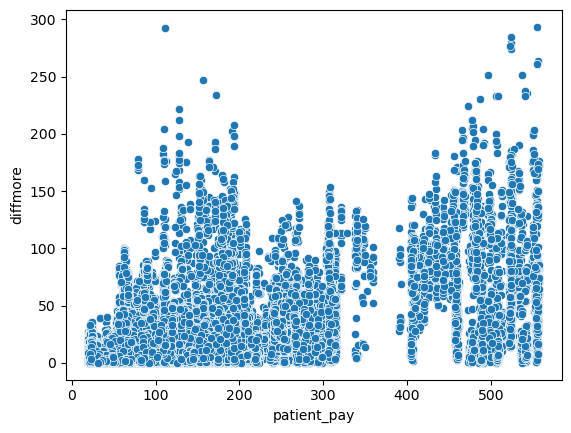

In [24]:
dplot2 =sns.scatterplot(x=test_labelmore, y=diffmore)
dplot2.set(xlabel='patient_pay', ylabel='diffmore')
plt.plot()

(array([2.207121e+06, 3.676431e+06, 2.872074e+06, 6.179710e+05,
        2.119120e+05, 1.670570e+05, 1.637800e+05, 8.592400e+04,
        1.511900e+05, 1.132620e+05, 1.195870e+05, 1.237940e+05,
        5.618300e+04, 8.016100e+04, 1.044670e+05, 7.876700e+04,
        1.121040e+05, 2.848400e+04, 2.626800e+04, 3.852800e+04,
        3.220100e+04, 8.458000e+03, 1.138700e+04, 1.263200e+04,
        1.993500e+04, 3.573700e+04, 5.437300e+04, 3.955700e+04,
        4.564100e+04, 2.750500e+04, 2.408300e+04, 1.956600e+04,
        9.648000e+03, 1.220900e+04, 1.153300e+04, 8.912000e+03,
        9.209000e+03, 7.469000e+03, 7.714000e+03, 5.551000e+03,
        1.500000e+03, 8.590000e+02, 3.832000e+03, 4.821000e+03,
        4.335000e+03, 3.719000e+03, 4.107000e+03, 9.975000e+03,
        1.744000e+03, 1.814000e+03, 2.585000e+03, 5.430000e+02,
        1.519000e+03, 1.394000e+03, 3.503000e+03, 2.458000e+03,
        8.040000e+02, 1.750000e+02, 1.600000e+01, 0.000000e+00,
        4.150000e+02, 2.700000e+01, 9.60

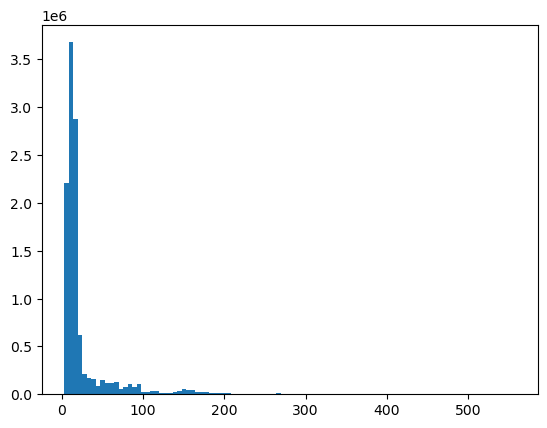

In [25]:
plt.hist(df['patient_pay'], bins=100)

In [26]:
### set more than $100

In [27]:
dfhund = df[df['patient_pay']>100]
trainhund, testhund = train_test_split(dfhund, test_size=0.2, shuffle=True, random_state=42)

In [28]:
train_datahund = trainhund.drop(columns=['patient_pay'])
train_labelhund = trainhund['patient_pay']

In [29]:
train_poolhund = Pool(train_datahund, train_labelhund, cat_features = list(range(6)))

In [30]:
modelhund = CatBoostRegressor(iterations =999, 
                         depth = 8,
                         learning_rate=.03,
                         loss_function = 'RMSE')
modelhund.fit(train_poolhund)

0:	learn: 77.6003500	total: 396ms	remaining: 6m 35s
1:	learn: 75.5458062	total: 693ms	remaining: 5m 45s
2:	learn: 73.5572116	total: 980ms	remaining: 5m 25s
3:	learn: 71.6345281	total: 1.31s	remaining: 5m 26s
4:	learn: 69.7798145	total: 1.67s	remaining: 5m 31s
5:	learn: 67.9976575	total: 1.94s	remaining: 5m 21s
6:	learn: 66.2823750	total: 2.15s	remaining: 5m 3s
7:	learn: 64.6105792	total: 2.42s	remaining: 4m 59s
8:	learn: 62.9979008	total: 2.66s	remaining: 4m 52s
9:	learn: 61.4360014	total: 2.93s	remaining: 4m 49s
10:	learn: 59.9297495	total: 3.2s	remaining: 4m 47s
11:	learn: 58.4799886	total: 3.48s	remaining: 4m 46s
12:	learn: 57.0792158	total: 3.74s	remaining: 4m 43s
13:	learn: 55.7320325	total: 4.01s	remaining: 4m 42s
14:	learn: 54.3770744	total: 4.31s	remaining: 4m 43s
15:	learn: 53.0656978	total: 4.63s	remaining: 4m 44s
16:	learn: 51.8008603	total: 4.92s	remaining: 4m 44s
17:	learn: 50.5822730	total: 5.21s	remaining: 4m 43s
18:	learn: 49.4087862	total: 5.5s	remaining: 4m 43s
19:	le

155:	learn: 14.8284295	total: 49.7s	remaining: 4m 28s
156:	learn: 14.8071353	total: 50.1s	remaining: 4m 28s
157:	learn: 14.7935458	total: 50.4s	remaining: 4m 28s
158:	learn: 14.7728098	total: 50.8s	remaining: 4m 28s
159:	learn: 14.7583135	total: 51.1s	remaining: 4m 27s
160:	learn: 14.7418562	total: 51.6s	remaining: 4m 28s
161:	learn: 14.7197853	total: 51.9s	remaining: 4m 28s
162:	learn: 14.7070881	total: 52.3s	remaining: 4m 28s
163:	learn: 14.6950510	total: 52.6s	remaining: 4m 28s
164:	learn: 14.6814790	total: 53s	remaining: 4m 27s
165:	learn: 14.6568136	total: 53.3s	remaining: 4m 27s
166:	learn: 14.6445495	total: 53.7s	remaining: 4m 27s
167:	learn: 14.6291703	total: 54s	remaining: 4m 27s
168:	learn: 14.6148142	total: 54.4s	remaining: 4m 26s
169:	learn: 14.5990418	total: 54.7s	remaining: 4m 26s
170:	learn: 14.5754122	total: 55s	remaining: 4m 26s
171:	learn: 14.5585648	total: 55.4s	remaining: 4m 26s
172:	learn: 14.5360951	total: 55.7s	remaining: 4m 25s
173:	learn: 14.5190855	total: 56s	

307:	learn: 12.6217002	total: 1m 39s	remaining: 3m 44s
308:	learn: 12.6137925	total: 1m 40s	remaining: 3m 43s
309:	learn: 12.6051984	total: 1m 40s	remaining: 3m 43s
310:	learn: 12.5880127	total: 1m 40s	remaining: 3m 43s
311:	learn: 12.5830714	total: 1m 41s	remaining: 3m 42s
312:	learn: 12.5783946	total: 1m 41s	remaining: 3m 42s
313:	learn: 12.5576887	total: 1m 41s	remaining: 3m 42s
314:	learn: 12.5549661	total: 1m 42s	remaining: 3m 41s
315:	learn: 12.5374829	total: 1m 42s	remaining: 3m 41s
316:	learn: 12.5280648	total: 1m 42s	remaining: 3m 41s
317:	learn: 12.5173652	total: 1m 43s	remaining: 3m 40s
318:	learn: 12.4975126	total: 1m 43s	remaining: 3m 40s
319:	learn: 12.4877162	total: 1m 43s	remaining: 3m 40s
320:	learn: 12.4787196	total: 1m 44s	remaining: 3m 40s
321:	learn: 12.4707966	total: 1m 44s	remaining: 3m 39s
322:	learn: 12.4606594	total: 1m 44s	remaining: 3m 39s
323:	learn: 12.4521311	total: 1m 45s	remaining: 3m 39s
324:	learn: 12.4431261	total: 1m 45s	remaining: 3m 38s
325:	learn

458:	learn: 11.5601181	total: 2m 29s	remaining: 2m 55s
459:	learn: 11.5564995	total: 2m 29s	remaining: 2m 55s
460:	learn: 11.5494073	total: 2m 29s	remaining: 2m 54s
461:	learn: 11.5478829	total: 2m 30s	remaining: 2m 54s
462:	learn: 11.5445920	total: 2m 30s	remaining: 2m 54s
463:	learn: 11.5405545	total: 2m 30s	remaining: 2m 53s
464:	learn: 11.5324959	total: 2m 31s	remaining: 2m 53s
465:	learn: 11.5244955	total: 2m 31s	remaining: 2m 53s
466:	learn: 11.5221361	total: 2m 31s	remaining: 2m 52s
467:	learn: 11.5146766	total: 2m 32s	remaining: 2m 52s
468:	learn: 11.5067161	total: 2m 32s	remaining: 2m 52s
469:	learn: 11.5015169	total: 2m 32s	remaining: 2m 51s
470:	learn: 11.5002005	total: 2m 33s	remaining: 2m 51s
471:	learn: 11.4909543	total: 2m 33s	remaining: 2m 51s
472:	learn: 11.4899033	total: 2m 33s	remaining: 2m 50s
473:	learn: 11.4847697	total: 2m 34s	remaining: 2m 50s
474:	learn: 11.4757271	total: 2m 34s	remaining: 2m 50s
475:	learn: 11.4742922	total: 2m 34s	remaining: 2m 49s
476:	learn

608:	learn: 10.9066386	total: 3m 17s	remaining: 2m 6s
609:	learn: 10.9041766	total: 3m 17s	remaining: 2m 6s
610:	learn: 10.9012483	total: 3m 18s	remaining: 2m 5s
611:	learn: 10.8982985	total: 3m 18s	remaining: 2m 5s
612:	learn: 10.8965241	total: 3m 18s	remaining: 2m 5s
613:	learn: 10.8936394	total: 3m 19s	remaining: 2m 4s
614:	learn: 10.8851796	total: 3m 19s	remaining: 2m 4s
615:	learn: 10.8844681	total: 3m 20s	remaining: 2m 4s
616:	learn: 10.8713819	total: 3m 20s	remaining: 2m 4s
617:	learn: 10.8589940	total: 3m 20s	remaining: 2m 3s
618:	learn: 10.8573083	total: 3m 21s	remaining: 2m 3s
619:	learn: 10.8549208	total: 3m 21s	remaining: 2m 3s
620:	learn: 10.8486928	total: 3m 21s	remaining: 2m 2s
621:	learn: 10.8470942	total: 3m 22s	remaining: 2m 2s
622:	learn: 10.8455263	total: 3m 22s	remaining: 2m 2s
623:	learn: 10.8428558	total: 3m 22s	remaining: 2m 1s
624:	learn: 10.8355413	total: 3m 23s	remaining: 2m 1s
625:	learn: 10.8336616	total: 3m 23s	remaining: 2m 1s
626:	learn: 10.8318711	total

759:	learn: 10.3821159	total: 4m 8s	remaining: 1m 18s
760:	learn: 10.3811736	total: 4m 8s	remaining: 1m 17s
761:	learn: 10.3781130	total: 4m 9s	remaining: 1m 17s
762:	learn: 10.3771466	total: 4m 9s	remaining: 1m 17s
763:	learn: 10.3727569	total: 4m 9s	remaining: 1m 16s
764:	learn: 10.3696509	total: 4m 10s	remaining: 1m 16s
765:	learn: 10.3687417	total: 4m 10s	remaining: 1m 16s
766:	learn: 10.3673371	total: 4m 10s	remaining: 1m 15s
767:	learn: 10.3660945	total: 4m 11s	remaining: 1m 15s
768:	learn: 10.3590907	total: 4m 11s	remaining: 1m 15s
769:	learn: 10.3556341	total: 4m 11s	remaining: 1m 14s
770:	learn: 10.3550195	total: 4m 12s	remaining: 1m 14s
771:	learn: 10.3539894	total: 4m 12s	remaining: 1m 14s
772:	learn: 10.3521539	total: 4m 12s	remaining: 1m 13s
773:	learn: 10.3500454	total: 4m 13s	remaining: 1m 13s
774:	learn: 10.3439933	total: 4m 13s	remaining: 1m 13s
775:	learn: 10.3403478	total: 4m 13s	remaining: 1m 12s
776:	learn: 10.3388813	total: 4m 14s	remaining: 1m 12s
777:	learn: 10.

912:	learn: 9.9668758	total: 4m 59s	remaining: 28.2s
913:	learn: 9.9629978	total: 4m 59s	remaining: 27.9s
914:	learn: 9.9619977	total: 4m 59s	remaining: 27.5s
915:	learn: 9.9580811	total: 5m	remaining: 27.2s
916:	learn: 9.9539786	total: 5m	remaining: 26.9s
917:	learn: 9.9519539	total: 5m	remaining: 26.5s
918:	learn: 9.9506202	total: 5m 1s	remaining: 26.2s
919:	learn: 9.9496194	total: 5m 1s	remaining: 25.9s
920:	learn: 9.9488828	total: 5m 1s	remaining: 25.6s
921:	learn: 9.9477257	total: 5m 2s	remaining: 25.2s
922:	learn: 9.9465082	total: 5m 2s	remaining: 24.9s
923:	learn: 9.9439330	total: 5m 2s	remaining: 24.6s
924:	learn: 9.9424634	total: 5m 3s	remaining: 24.3s
925:	learn: 9.9405458	total: 5m 3s	remaining: 23.9s
926:	learn: 9.9379659	total: 5m 3s	remaining: 23.6s
927:	learn: 9.9374575	total: 5m 4s	remaining: 23.3s
928:	learn: 9.9340272	total: 5m 4s	remaining: 22.9s
929:	learn: 9.9314926	total: 5m 4s	remaining: 22.6s
930:	learn: 9.9294900	total: 5m 5s	remaining: 22.3s
931:	learn: 9.9285

In [31]:
test_datahund = testhund.drop(columns=['patient_pay'])
test_labelhund = testhund['patient_pay']
predshund=modelhund.predict(test_datahund)
diffhund = abs(predshund - test_labelhund)
diffhund.describe()

count    111321.000000
mean          4.468697
std           8.627297
min           0.000101
25%           0.793624
50%           1.941075
75%           4.397622
max         151.933766
Name: patient_pay, dtype: float64

In [33]:
np.percentile(diffhund, 90), np.percentile(diffhund, 95), np.percentile(diffhund, 98), \
np.percentile(diffhund, 99), np.percentile(diffhund, 100)

(9.898209694973445,
 17.38604712021464,
 28.871806202069347,
 45.83140850863327,
 151.93376632409604)

In [60]:
diffhund.column = 'diff'

In [66]:
errordfhund = df.loc[diffhund[diffhund>100].index]
errordfhund

,pharmacy,diagnosis,patient_pay,brand,drug_name,month,insurance
3819170,9,U75.95,555.24,branded,monemodiase,4,AZUO5UIGN6JL34H37D
1656530,24,U75.95,308.08,branded,monemodiase,2,393UXY5GQQ9
10456483,29,P79.51,289.83,branded,pheromycin,11,nanYY6B1J4E8KJ3
8918078,24,U75.95,308.08,branded,monemodiase,9,393UXY5GQQ9
12266493,7,U75.95,534.75,branded,monemodiase,12,YICC41MP3IQ
...,...,...,...,...,...,...,...
1993508,20,C14.36,295.41,branded,pheromycin,3,YICC41MP3IQ
10446960,27,U75.95,497.83,branded,monemodiase,11,K5KDJ7G1N5IRQ
8129843,35,U75.95,497.82,branded,monemodiase,9,IF448FZPLF4O6FD
1466083,34,U75.95,313.09,branded,monemodiase,2,TAZ5WT51T6V2E8L


In [67]:
errordfhund = pd.merge(errordfhund, diffhund, right_index=True, left_index=True)
errordfhund

,pharmacy,diagnosis,patient_pay_x,brand,drug_name,month,insurance,patient_pay_y
3819170,9,U75.95,555.24,branded,monemodiase,4,AZUO5UIGN6JL34H37D,144.370941
1656530,24,U75.95,308.08,branded,monemodiase,2,393UXY5GQQ9,104.428762
10456483,29,P79.51,289.83,branded,pheromycin,11,nanYY6B1J4E8KJ3,105.619542
8918078,24,U75.95,308.08,branded,monemodiase,9,393UXY5GQQ9,111.619889
12266493,7,U75.95,534.75,branded,monemodiase,12,YICC41MP3IQ,121.242906
...,...,...,...,...,...,...,...,...
1993508,20,C14.36,295.41,branded,pheromycin,3,YICC41MP3IQ,113.806973
10446960,27,U75.95,497.83,branded,monemodiase,11,K5KDJ7G1N5IRQ,116.338798
8129843,35,U75.95,497.82,branded,monemodiase,9,IF448FZPLF4O6FD,103.122622
1466083,34,U75.95,313.09,branded,monemodiase,2,TAZ5WT51T6V2E8L,115.937600


In [68]:
errordfhund['drug_name'].value_counts()

monemodiase       63
pheromycin        28
flacelfatastat     1
Name: drug_name, dtype: int64

In [69]:
df[df['drug_name']=='monemodiase'].describe()

,pharmacy,patient_pay,month
count,24180.000000,24180.000000,24180.000000
mean,28.318031,405.612155,6.765302
std,16.919420,177.904912,3.418136
min,0.000000,15.020000,1.000000
25%,13.000000,315.300000,4.000000
50%,29.000000,490.750000,7.000000
75%,43.000000,521.940000,10.000000
max,57.000000,557.930000,12.000000
